In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
# Helper Functions
def list_feature_values(df):
    '''Function will return Dataframe with Fearure Descriptions: '''
    _ = pd.DataFrame(columns = ['Cardinality', 'Values'])
    for col in df.columns:
        FeatureName = col
        Feature_Cardinality = df[col].nunique()
        Feature_Cardinality_Values = [
            ", ".join(list(map(str, df[col].unique())))
            if df[col].nunique() < 10 
            else f'''{", ".join(list(map(str, df[col].unique()[:10])))}, ...'''
        ]
        _index = _.shape[0]
        _.loc[FeatureName, "Cardinality"] = Feature_Cardinality
        _.loc[FeatureName, "Values"] = Feature_Cardinality_Values
        _.loc[FeatureName, 'Null Values'] = round(100*(df[col].isna().sum()/df.shape[0]), 2)
    return _

In [4]:
df = pd.read_parquet(r'../dataset/churn.parquet')
df.head(3)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1


In [5]:
print('count: Records:', df.shape[0])
print('count: features:', df.shape[1], end = '\n\n')


count: Records: 36992
count: features: 23



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [7]:
# Checking NA Values
round(100*((df.isna() | df.isnull()).sum()/df.shape[0]), 2)

age                              0.00
gender                           0.00
security_no                      0.00
region_category                 14.67
membership_category              0.00
joining_date                     0.00
joined_through_referral          0.00
referral_id                      0.00
preferred_offer_types            0.78
medium_of_operation              0.00
internet_option                  0.00
last_visit_time                  0.00
days_since_last_login            0.00
avg_time_spent                   0.00
avg_transaction_value            0.00
avg_frequency_login_days         0.00
points_in_wallet                 9.31
used_special_discount            0.00
offer_application_preference     0.00
past_complaint                   0.00
complaint_status                 0.00
feedback                         0.00
churn_risk_score                 0.00
dtype: float64

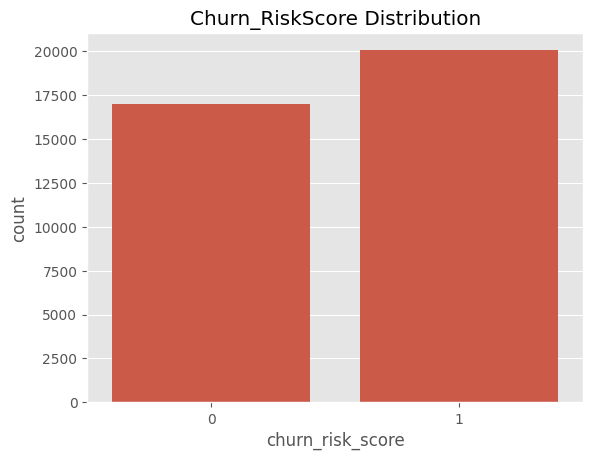

<Figure size 1200x800 with 0 Axes>

In [12]:
sns.countplot(x='churn_risk_score', data=df, orient = 'h')

plt.title('Churn_RiskScore Distribution')
plt.figure(figsize=(12, 8))
plt.show()

<Figure size 1200x800 with 0 Axes>

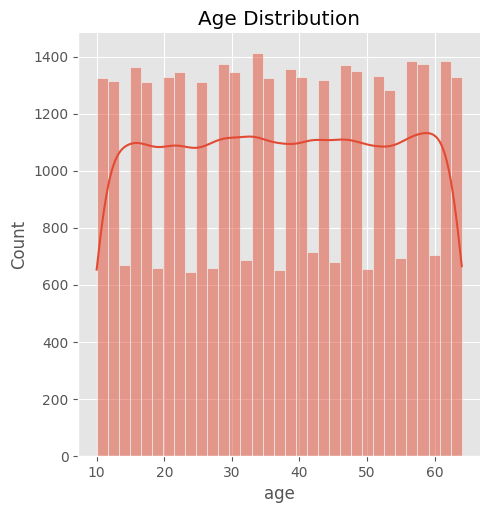

In [41]:
plt.figure(figsize=(12, 8))
sns.displot(df['age'], kde = True, )
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of Avg_transaction_value vs Age')

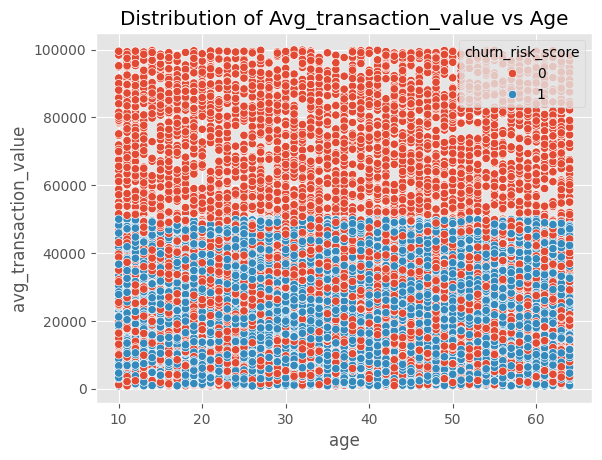

In [31]:
sns.scatterplot(data = df, x = 'age', y = 'avg_transaction_value', hue = 'churn_risk_score')
plt.title('Distribution of Avg_transaction_value vs Age')

From the scatter plot, we can observe that higher average transaction values seem to be associated with a lower churn risk score (red points). In other words:

 - Red points (lower churn risk score) are more concentrated in the higher range of transaction values (closer to 60,000–100,000).
 - Blue points (higher churn risk score) are mostly found in the lower transaction value range (closer to 0–40,000).

This suggests that people with higher transaction values tend to have a lower likelihood of churning (churn risk score = 0), whereas those with lower transaction values are more likely to churn (churn risk score = 1).
This pattern implies that customers with higher spending might be more loyal or engaged, while those with lower spending might be at higher risk of leaving.

 - But it doesn't show strong corelation which means it also depends on other factors

Text(0.5, 1.0, 'Distribution: Avg Time Spent')

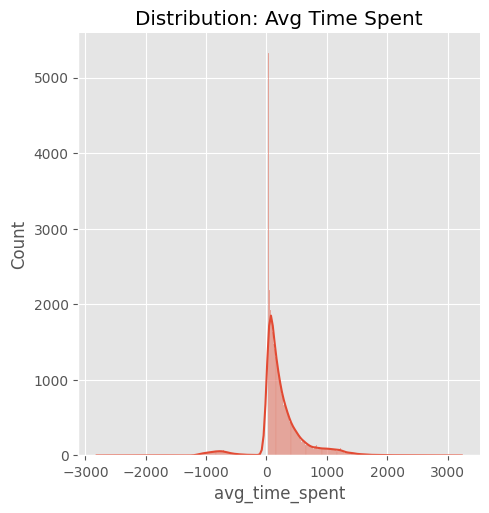

In [44]:
sns.displot(df['avg_time_spent'], kde = True)
plt.title('Distribution: Avg Time Spent')

Avg. Time Spent cannot be negative value:
 - Data Error: During record of data or system error
 - Time Diffrence Calculations: Calculating Time diffrence accross diffrent timezone may result in negative time spent

In [50]:
# Statistics of Col: Avg. Time Spent
print('Statistics: Avg. Time Spent')
df.avg_time_spent.describe().T

Statistics: Avg. Time Spent


count    36992.000000
mean       243.472334
std        398.289149
min      -2814.109110
25%         60.102500
50%        161.765000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64

In [56]:
df[df['avg_time_spent']<0].groupby

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
28,61,F,QUU2V55,Village,Silver Membership,14-05-2017,?,CID29752,Gift Vouchers/Coupons,?,...,-936.744818,29156.10,10,710.38,Yes,No,Yes,No Information Available,No reason specified,1
41,22,M,YNN4REK,Town,No Membership,02-06-2017,Yes,CID48405,Without Offers,?,...,-930.207844,8415.63,17,650.44,No,Yes,Yes,Solved in Follow-up,Too many ads,1
60,28,M,X54XOQB,Village,Gold Membership,17-05-2017,Yes,CID11661,Gift Vouchers/Coupons,Smartphone,...,-615.344319,13131.05,13,820.91,Yes,Yes,No,Not Applicable,Quality Customer Care,0
79,54,M,XR0FV22,Town,Silver Membership,21-06-2017,?,CID58493,Credit/Debit Card Offers,Smartphone,...,-687.629574,42060.89,24,684.69,Yes,No,Yes,No Information Available,Poor Website,1
116,51,M,LOSAGM2,Village,Platinum Membership,22-09-2017,No,xxxxxxxx,Without Offers,Desktop,...,-494.083877,40667.27,19,809.83,Yes,No,No,Not Applicable,Reasonable Price,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36794,40,M,FBED1AR,Village,Basic Membership,22-10-2016,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,-977.809108,8122.12,11,717.04,No,Yes,Yes,Unsolved,Poor Customer Service,0
36819,15,F,T8OYUVD,Town,Platinum Membership,22-06-2016,?,CID47344,Gift Vouchers/Coupons,Smartphone,...,-910.568433,8496.95,19,719.73,No,Yes,Yes,Unsolved,Poor Customer Service,0
36956,26,F,VR7PS0Q,Town,Silver Membership,03-03-2017,?,CID47305,Without Offers,Smartphone,...,-746.034591,39720.55,21,683.63,No,Yes,Yes,Unsolved,Poor Website,1
36987,46,F,6F51HFO,None,Basic Membership,21-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,-650.682758,27277.68,6,639.51,No,Yes,Yes,No Information Available,No reason specified,1
